In [22]:
from Assemblies.game import GameField
import numpy as np
from numpy import random
import time

%matplotlib inline
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

In [2]:
def calculate_density(size, percentage=10, tries=1, start=1, end=2, step=0.05, evol=100):

    b_points = np.arange(start, end, step)

    #densities = np.array([0.0 for b in b_points])
    densities = np.array([])
    
    for i in range(tries):
        random.seed(i)
        instance = np.array(random.rand(size, size) > 0.01 * percentage, dtype=int)

        density = np.array([])

        print("\n" + str(i) + " >", end="")
        for b in b_points:
            game = GameField(size, b)
            game.field = np.copy(instance)

            game.evolve(evol)
            print("*", end="")
            density = np.append(density, [[(np.count_nonzero(1 - game.field) / size**2)]])


        densities = np.append(densities, density)

    return densities.reshape(tries, -1)

In [49]:
densities = calculate_density(210, step=0.02, evol=250, tries=10)


0 >**************************************************
1 >**************************************************
2 >**************************************************
3 >**************************************************
4 >**************************************************
5 >**************************************************
6 >**************************************************
7 >**************************************************
8 >**************************************************
9 >**************************************************

In [50]:
avr_densities = sum(densities) / len(densities)
avr_densities

array([0.993399, 0.997599, 0.997599, 0.997599, 0.997599, 0.997599,
       0.997599, 0.997599, 0.997599, 0.989351, 0.991175, 0.991175,
       0.991175, 0.946959, 0.946959, 0.946959, 0.946959, 0.938803,
       0.938803, 0.938803, 0.932263, 0.932263, 0.932263, 0.932263,
       0.932263, 0.976147, 0.976147, 0.976147, 0.976147, 0.976147,
       0.976147, 0.976147, 0.976147, 0.976147, 0.975619, 0.975619,
       0.975619, 0.975619, 0.949485, 0.949485, 0.949485, 0.949485,
       0.949485, 0.949485, 0.949485, 0.949485, 0.949485, 0.949485,
       0.949485, 0.949485])

In [51]:
errs = np.array([])
for i in range(len(avr_densities)):
    err = np.sqrt( sum((avr_densities[i] - densities[::, i])**2) / len(avr_densities) )
    errs = np.append(errs, err) 
    
np.set_printoptions(precision=6)
errs

array([1.677054e-04, 9.420125e-05, 9.420125e-05, 9.420125e-05,
       9.420125e-05, 9.420125e-05, 9.420125e-05, 9.420125e-05,
       9.420125e-05, 6.339675e-04, 4.728269e-04, 4.728269e-04,
       4.728269e-04, 1.117713e-03, 1.117713e-03, 1.117713e-03,
       1.117713e-03, 7.861623e-04, 7.861623e-04, 7.861623e-04,
       1.409649e-03, 1.409649e-03, 1.409649e-03, 1.409649e-03,
       1.409649e-03, 1.408486e-03, 1.408486e-03, 1.408486e-03,
       1.408486e-03, 1.408486e-03, 1.408486e-03, 1.408486e-03,
       1.408486e-03, 1.408486e-03, 1.754286e-03, 1.754286e-03,
       1.754286e-03, 1.754286e-03, 2.772856e-03, 2.772856e-03,
       2.772856e-03, 2.772856e-03, 2.772856e-03, 2.772856e-03,
       2.772856e-03, 2.772856e-03, 2.772856e-03, 2.772856e-03,
       2.772856e-03, 2.772856e-03])

<ErrorbarContainer object of 3 artists>

<Figure size 432x288 with 0 Axes>

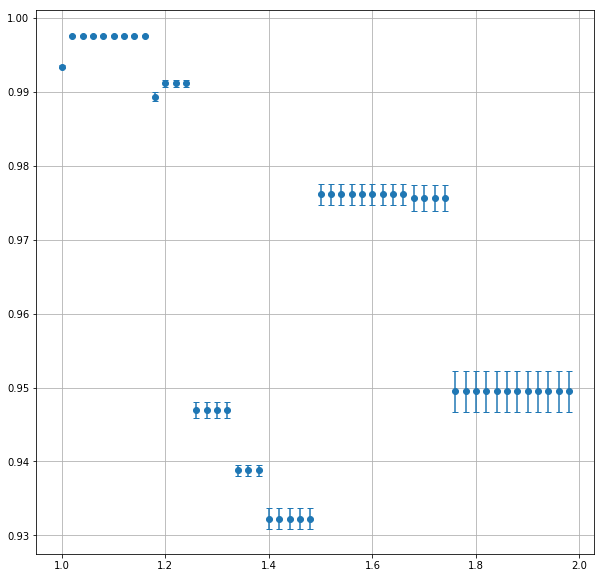

In [57]:
b_points = np.arange(1, 2, 0.02)

scale = 10
plt.clf()
plt.figure(figsize = (scale, scale))
plt.grid(True)
# plt.plot(b_points, avr_densities, "o")
plt.errorbar(b_points, avr_densities, yerr=errs, fmt='o', capsize=3)